## Please follow the below structure while attempting the hackathon, make sure to submit only one jupyter file with all the models, and you can always mention your best model by giving it the header as 'Best Model'.

## Please make sure to maintain the clarity of analysis in the notebook with proper headers and inisghts/inferences, so that it can be interpretable 


## Please follow the same format as mentioned below, as you will be evaluated basis on your Jupyter Notebook for L2 selection.

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Settings for pandas and matplotlib

%matplotlib inline
pd.set_option('display.max_columns', None)

## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments























In [2]:
# Import the data from csv file

train_data = pd.read_csv('Data_Train.csv')
test_data = pd.read_csv('Data_Test.csv')

# Display the first 5 rows
train_data.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [3]:
test_data.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,16.9176,90600.0,17955.00,0,8.88,78.432,1,59769.30,0.0,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MOR??AGE,0,0,Speech Language Pathologist,28.6944,32300.0,59850.00,0,10.10,76.368,1,532962.13,0.0,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MOR??AGE,0,0,Raytheon,51.1560,88000.0,59850.00,0,19.30,157.552,2,288816.48,0.0,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MOR??AGE,1,0,Computer/Network Technician,27.0144,19900.0,19323.00,0,8.82,32.852,2,424664.30,0.0,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MOR??AGE,0,0,NDE Tech,10.3824,34900.0,25350.75,1,13.52,108.532,1,251704.07,0.0,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [4]:
# Print the shape of dataframe

print('Shape of train data :',train_data.shape)
print('Shape of test data :',test_data.shape)


# Print the data types of columns

train_data.info()

Shape of train data : (87500, 30)
Shape of test data : (37500, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged   

In [5]:
# Print the number of unique values in each column

train_data.nunique()

ID                     87500
Asst_Reg               83966
GGGrade                    7
Experience                11
Validation                 3
Yearly Income           6871
Home Status                5
Unpaid 2 years            18
Already Defaulted          7
Designation            40354
Debt to Income          3964
Postal Code              865
Lend Amount             1298
Deprecatory Records       18
Interest Charged        1701
Usage Rate              1088
Inquiries                  8
Present Balance        73819
Gross Collection        1678
Sub GGGrade               35
File Status                2
State                     49
Account Open              59
Total Unpaid CL         4385
Duration                   2
Unpaid Amount          34679
Reason                    13
Claim Type                 2
Due Fee                  608
Loan/No Loan               2
dtype: int64

In [5]:
# List of numerical and categorical columns

num_col = ['Asst_Reg', 'Yearly Income','Unpaid 2 years','Already Defaulted','Debt to Income','Lend Amount','Deprecatory Records',
           'Interest Charged','Usage Rate','Inquiries', 'Present Balance','Gross Collection', 'Account Open',
           'Total Unpaid CL','Unpaid Amount','Due Fee']

cat_col = ['ID','Postal Code','GGGrade','Experience','Validation','Home Status','Designation','File Status',
           'State', 'Sub GGGrade', 'Reason','Duration','Claim Type']

target_col = ['Loan/No Loan']

# Convert to appropriate datatypes

train_data[cat_col] = train_data[cat_col].astype('O')
train_data[num_col] = train_data[num_col].astype('float64')

test_data[cat_col] = test_data[cat_col].astype('O')
test_data[num_col] = test_data[num_col].astype('float64')

In [6]:
# Description of numerical columns

train_data.describe(include = np.number)

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Loan/No Loan
count,8.750000e+04,8.192500e+04,87500.000000,87500.000000,84011.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.00000,8.331400e+04,8.264800e+04,87500.000000,87500.000000
mean,3.798914e+06,1.348596e+05,0.332937,0.005726,30.942660,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,12.77944,5.326864e+04,2.955649e+04,0.316407,0.188709
std,2.289038e+06,9.882473e+04,0.876080,0.083505,14.079813,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,5.37116,5.325551e+04,3.745625e+04,3.546087,0.391279
min,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,2.00000,3.320000e+02,0.000000e+00,0.000000,0.000000
25%,1.483874e+06,8.324659e+04,0.000000,0.000000,20.428800,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,9.00000,2.324000e+04,1.144674e+04,0.000000,0.000000
50%,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,12.00000,3.967400e+04,2.089278e+04,0.000000,0.000000
75%,5.952909e+06,1.601600e+05,0.000000,0.000000,40.908000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,16.00000,6.640000e+04,3.644908e+04,0.000000,0.000000
max,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,83.00000,1.710630e+06,1.338778e+06,169.050000,1.000000


In [7]:
# Description of numerical columns

test_data.describe(include = np.number)

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
count,3.750000e+04,3.507500e+04,37500.000000,37500.000000,35989.00000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,3.750000e+04,37500.000000,37500.000000,3.568600e+04,3.543100e+04,37500.000000
mean,3.804858e+06,1.340308e+05,0.336427,0.005307,30.91903,25828.004160,0.200080,16.511014,95.259109,0.676640,2.353528e+05,39.484071,12.777787,5.344820e+04,2.928066e+04,0.309792
std,2.284115e+06,1.000845e+05,0.887640,0.077966,13.87167,14402.061788,0.563137,4.912595,40.493219,0.964515,2.543097e+05,364.114581,5.360527,5.215483e+04,3.560849e+04,3.396315
min,3.752200e+04,8.800000e+03,0.000000,0.000000,0.00000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,3.320000e+02,0.000000e+00,0.000000
25%,1.495828e+06,8.419400e+04,0.000000,0.000000,20.47920,14919.750000,0.000000,12.250000,65.532000,0.000000,5.129572e+04,0.000000,9.000000,2.324000e+04,1.141425e+04,0.000000
50%,4.134010e+06,1.144000e+05,0.000000,0.000000,30.18960,23811.750000,0.000000,16.515000,96.492000,0.000000,1.383795e+05,0.000000,12.000000,3.950800e+04,2.068074e+04,0.000000
75%,5.934898e+06,1.584000e+05,0.000000,0.000000,40.72320,34200.000000,0.000000,20.770000,126.764000,1.000000,3.514983e+05,0.000000,15.000000,6.640000e+04,3.618446e+04,0.000000
max,7.351969e+06,8.800000e+06,18.000000,3.000000,116.50800,59850.000000,21.000000,25.000000,254.560000,6.000000,4.909890e+06,13900.000000,60.000000,1.475408e+06,1.535830e+06,131.490000


In [8]:
# Description of categorical columns

train_data.describe(include = 'object')

,ID,GGGrade,Experience,Validation,Home Status,Designation,Postal Code,Sub GGGrade,File Status,State,Duration,Reason,Claim Type
count,87500,87500,87500,87500,87500,86086,86111.0,87500,87500,87500,87500,87500,87500
unique,87500,7,11,3,5,40354,865.0,35,2,49,2,13,2
top,131072,II,>10yrs,Source Verified,MOR??AGE,School Teacher,75000.0,19,whole,California,3 years,debt consolidation,I
freq,1,24966,30849,34504,44160,1585,977.0,5454,46300,12625,60061,52559,87454


In [9]:
# Description of categorical columns

test_data.describe(include = 'object')

,ID,GGGrade,Experience,Validation,Home Status,Designation,Postal Code,Sub GGGrade,File Status,State,Duration,Reason,Claim Type
count,37500,37500,37500,37500,37500,36914,36889.0,37500,37500,37500,37500,37500,37500
unique,37500,7,11,3,5,19510,849.0,35,2,49,2,13,2
top,196612,III,>10yrs,Source Verified,MOR??AGE,School Teacher,75000.0,18,whole,California,3 years,debt consolidation,I
freq,1,10682,13159,14646,18912,666,422.0,2337,19954,5514,25809,22463,37480


In [10]:
# Print null values percentage of each column

(train_data.isnull().sum()/len(train_data) *100).sort_values(ascending=False)

Yearly Income          6.371429
Unpaid Amount          5.545143
Total Unpaid CL        4.784000
Debt to Income         3.987429
Designation            1.616000
Postal Code            1.587429
Sub GGGrade            0.000000
File Status            0.000000
State                  0.000000
Account Open           0.000000
ID                     0.000000
Present Balance        0.000000
Duration               0.000000
Reason                 0.000000
Claim Type             0.000000
Due Fee                0.000000
Gross Collection       0.000000
Usage Rate             0.000000
Inquiries              0.000000
Asst_Reg               0.000000
Interest Charged       0.000000
Deprecatory Records    0.000000
Lend Amount            0.000000
Already Defaulted      0.000000
Unpaid 2 years         0.000000
Home Status            0.000000
Validation             0.000000
Experience             0.000000
GGGrade                0.000000
Loan/No Loan           0.000000
dtype: float64

In [11]:
# For test data
(test_data.isnull().sum()/len(test_data) *100).sort_values(ascending=False)

Yearly Income          6.466667
Unpaid Amount          5.517333
Total Unpaid CL        4.837333
Debt to Income         4.029333
Postal Code            1.629333
Designation            1.562667
ID                     0.000000
Present Balance        0.000000
Claim Type             0.000000
Reason                 0.000000
Duration               0.000000
Account Open           0.000000
State                  0.000000
File Status            0.000000
Sub GGGrade            0.000000
Gross Collection       0.000000
Interest Charged       0.000000
Inquiries              0.000000
Usage Rate             0.000000
Asst_Reg               0.000000
Deprecatory Records    0.000000
Lend Amount            0.000000
Already Defaulted      0.000000
Unpaid 2 years         0.000000
Home Status            0.000000
Validation             0.000000
Experience             0.000000
GGGrade                0.000000
Due Fee                0.000000
dtype: float64

In [12]:
# Null value treatment for train & test set

# Since the percentage of null values is less than 10%, we can impute the central values (median for numerical & mode for categorical)
# without any significant bias or loss of information

for col in ['Yearly Income','Unpaid Amount','Total Unpaid CL','Debt to Income']:
    median = train_data[col].median()
    train_data[col].fillna(median, inplace=True)
    test_data[col].fillna(median, inplace=True)
    
for col in ['Postal Code','Designation']:
    mode = train_data[col].mode()[0]
    train_data[col].fillna(mode, inplace=True)
    test_data[col].fillna(mode, inplace=True)

In [13]:
# Total no of null values after treatment

train_data.isnull().sum().sum()

0

In [14]:
# Print no of duplicate rows in train and test set

print('No of duplicates in train set =',train_data.duplicated().sum())
print('No of duplicates in test set =',test_data.duplicated().sum())

No of duplicates in train set = 0
No of duplicates in test set = 0


## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

























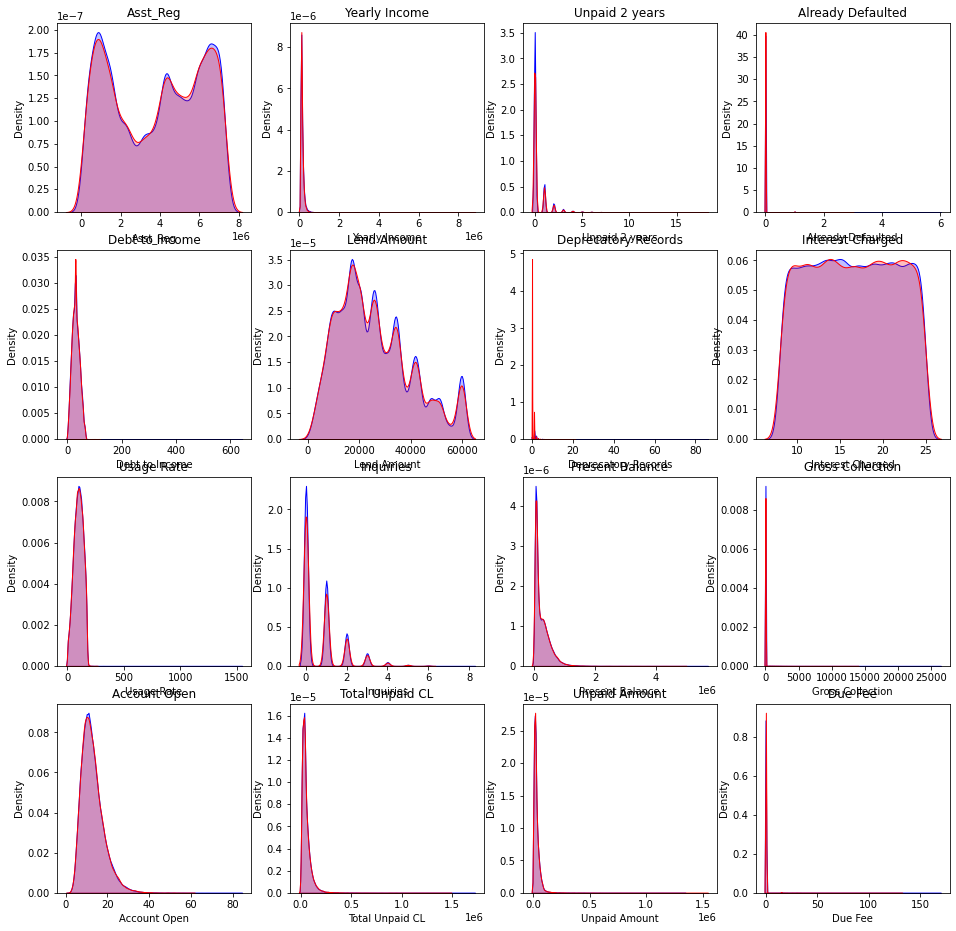

In [15]:
# Plot the kde plots of numerical columns

fig = plt.figure(figsize=(16,16))
i = 1
for col in num_col:
    ax = fig.add_subplot(4,4,i)
    sns.kdeplot(train_data[col], color='blue', shade=True, label='train', ax=ax)
    sns.kdeplot(test_data[col], color='red', shade=True, label='test', ax=ax)
    ax.set_title(col)
    i=i+1
plt.show()

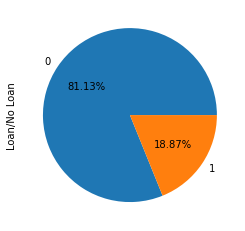

In [16]:
# Plot the distribution of target variable

train_data['Loan/No Loan'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

# It is imbalanced 4:1 in favor of 'no' (0) cases

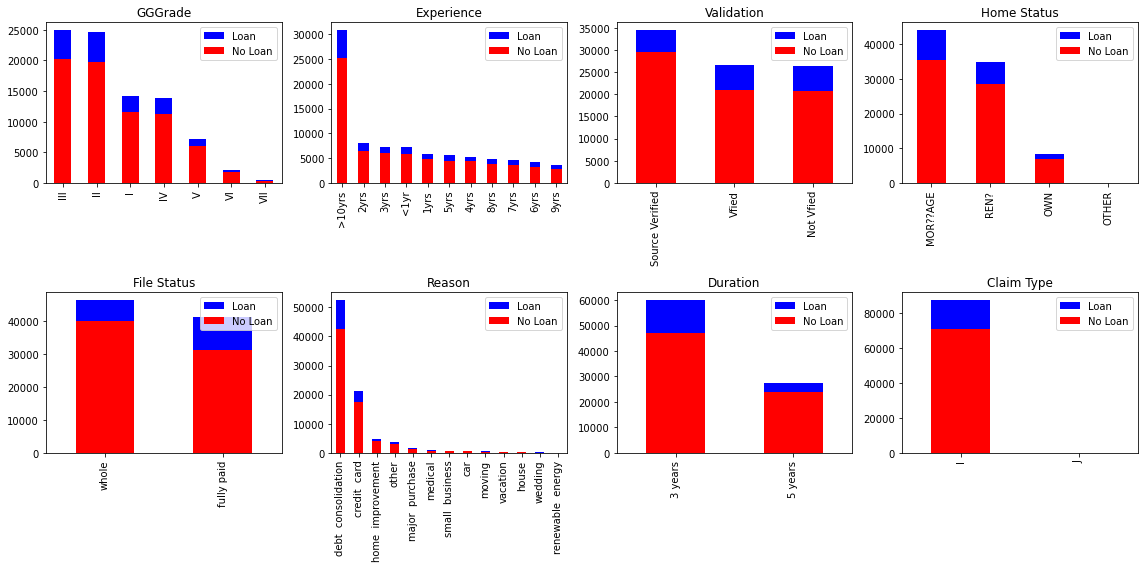

In [17]:
# Plot the barplots for categorical variables grouped by target

col_list = ['GGGrade','Experience','Validation','Home Status','File Status', 'Reason','Duration','Claim Type']
fig = plt.figure(figsize=(16,8))
i = 1
for col in col_list:
    ax = fig.add_subplot(2,4,i)
    train_data[col].value_counts().plot(kind='bar',color='b', ax=ax, label='Loan')
    train_data[train_data['Loan/No Loan'] == 0][col].value_counts().plot(kind='bar',color='r', ax=ax, label='No Loan')
    ax.set_title(col)
    ax.legend()
    i=i+1
plt.tight_layout()
plt.show()   

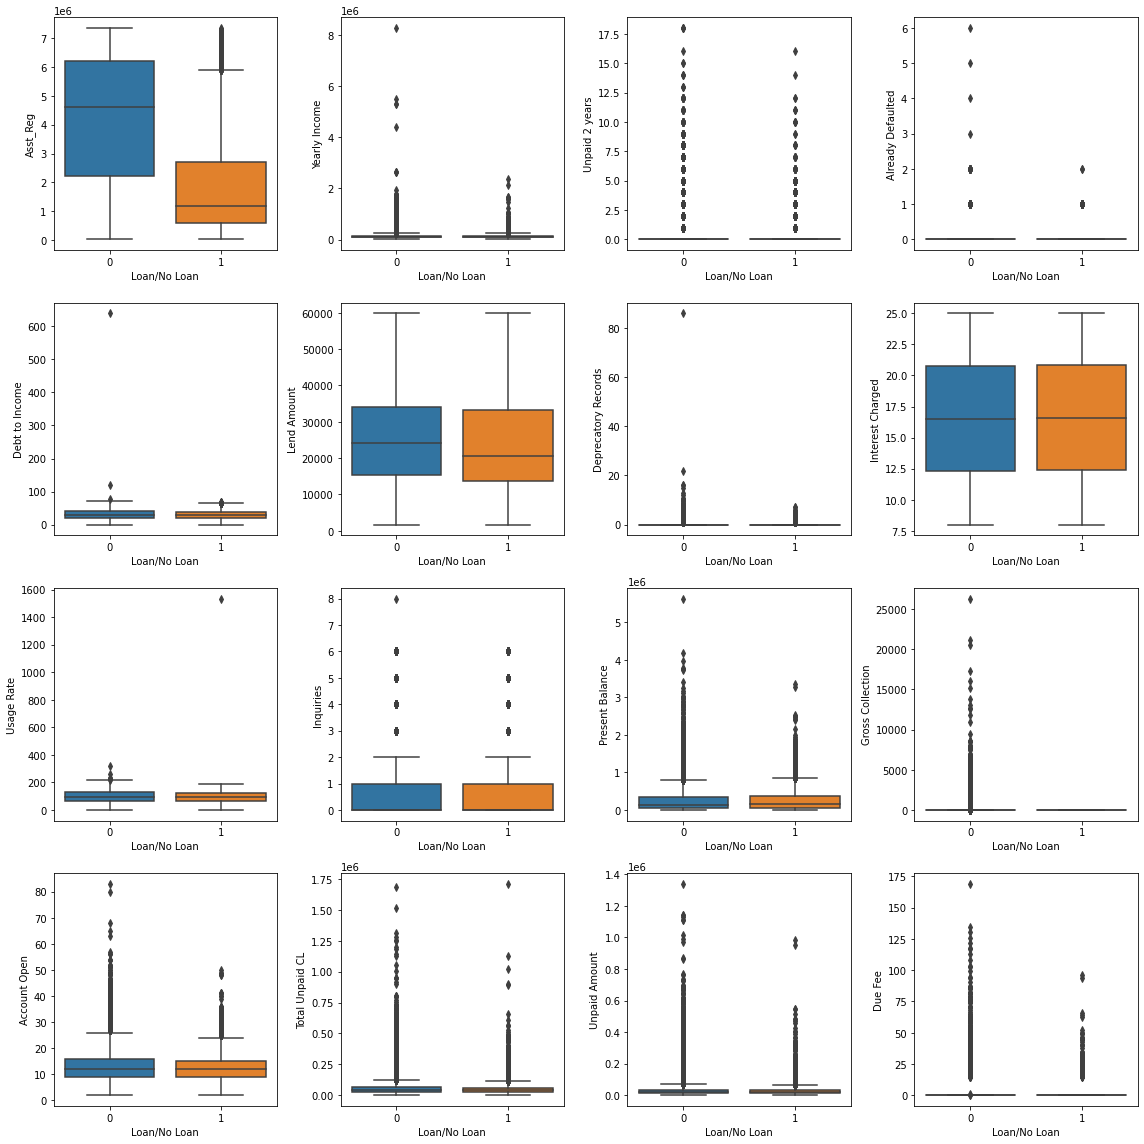

In [18]:
# Plot boxplots grouped by target for numerical variables

fig = plt.figure(figsize=(16,16))
i = 1
for col in num_col:
    ax = fig.add_subplot(4,4,i)
    sns.boxplot(data = train_data, x ='Loan/No Loan', y = col, ax=ax)
    i=i+1
plt.tight_layout()
plt.show()   

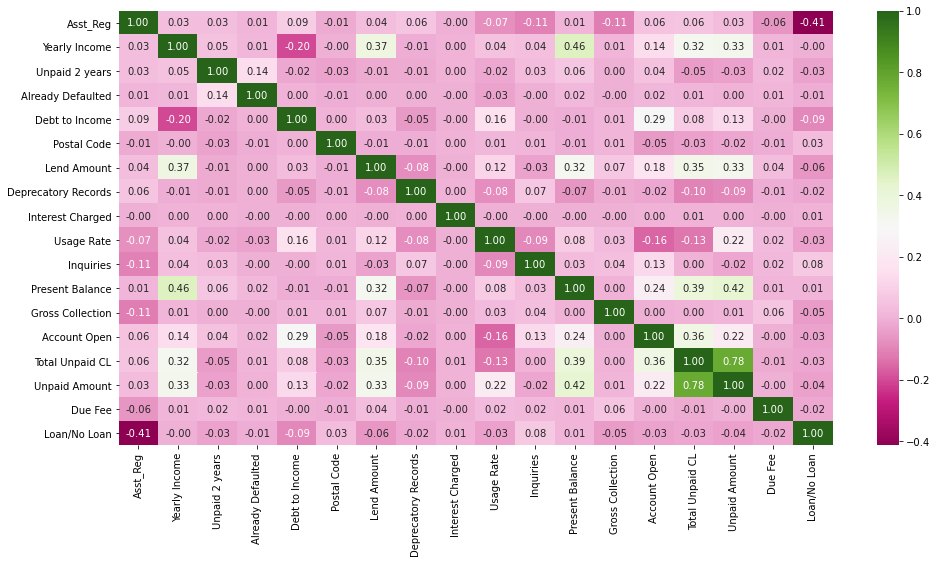

In [19]:
# Plot heatmap of correlation matrix for numeric variables

plt.figure(figsize = (16,8))
corr_mat = train_data.corr()
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap ='PiYG')
plt.show()

## 3 Feature Engineering

In this section you can implement the feature engineering techniques for dimensionality reduction












In [20]:
train_features = train_data.iloc[:,:-1]
train_target = train_data.iloc[:,-1]
test_features = test_data

# Drop irrelevant features

train_features = train_features.drop(['ID','Postal Code','Designation'], axis=1)
test_features = test_features.drop(['ID','Postal Code','Designation'], axis=1)

In [21]:
train_features.shape

(87500, 26)

In [22]:
# Remove special characters

train_features['Experience'] = train_features['Experience'].replace({'<1yr':'0yrs','>10yrs':'10yrs'})
test_features['Experience'] = test_features['Experience'].replace({'<1yr':'0yrs','>10yrs':'10yrs'})

train_features['Home Status'] = train_features['Home Status'].replace({'MOR??AGE':'MORTGAGE','REN?':'RENT'})
test_features['Home Status'] = test_features['Home Status'].replace({'MOR??AGE':'MORTGAGE','REN?':'RENT'})

In [23]:
# Scaling numerical variables 
# Excluding since it doesn't make a difference for tree-based models

train_features_num = train_features.drop(['Home Status','File Status','Reason','GGGrade',
                                          'Experience','Duration','Validation','Claim Type'], axis=1)
test_features_num = test_features.drop(['Home Status','File Status','Reason','GGGrade',
                                          'Experience','Duration','Validation','Claim Type'], axis=1)

# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# train_features_num = pd.DataFrame(ss.fit_transform(train_features_num), columns=train_features_num.columns).reset_index(drop=True)
# test_features_num = pd.DataFrame(ss.fit_transform(test_features_num), columns=test_features_num.columns).reset_index(drop=True)

In [27]:
# Label encoding of 'State'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_features['State'] = le.fit_transform(train_features['State'])
test_features['State'] = le.transform(test_features['State'])

## 4 Modelling + HyperParameter Tuning

In this you can build various ML models and try tuning the parameters involved to achieve better score

## Model 1

In [28]:
train_features.head()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,State,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Home Status_MORTGAGE,Home Status_NONE,Home Status_OTHER,Home Status_OWN,Home Status_RENT,File Status_fully paid,File Status_whole,Reason_car,Reason_credit card,Reason_debt consolidation,Reason_home improvement,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,GGGrade_I,GGGrade_II,GGGrade_III,GGGrade_IV,GGGrade_V,GGGrade_VI,GGGrade_VII,Experience_0yrs,Experience_10yrs,Experience_1yrs,Experience_2yrs,Experience_3yrs,Experience_4yrs,Experience_5yrs,Experience_6yrs,Experience_7yrs,Experience_8yrs,Experience_9yrs,Duration_3 years,Duration_5 years,Validation_Not Vfied,Validation_Source Verified,Validation_Vfied,Claim Type_I,Claim Type_J
0,421802.0,633600.00,0.0,0.0,12.5496,42023.25,0.0,15.39,88.924,3.0,607161.90,0.0,19,6,17.0,58598.0,31216.05,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,3964312.0,85483.20,0.0,0.0,9.0048,38133.00,0.0,9.94,102.856,0.0,269234.06,0.0,30,25,15.0,18924.0,11660.49,0.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
2,4247560.0,79200.00,0.0,0.0,24.9144,17100.00,0.0,22.35,60.372,0.0,22476.53,0.0,25,9,7.0,15604.0,5637.87,0.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,197179.0,61600.00,0.0,0.0,16.5816,5130.00,0.0,10.36,116.272,1.0,15242.09,0.0,22,31,9.0,22410.0,15607.17,0.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,4646684.0,68053.92,0.0,0.0,40.0512,19665.00,0.0,13.68,127.280,1.0,65433.94,0.0,32,16,10.0,36022.0,27472.86,0.0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [29]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=5)
dt_clf.fit(train_features, train_target)
train_predict = dt_clf.predict(train_features)
test_predict = dt_clf.predict(test_features)

In [30]:
# Print classification metric of train data. The values indicate overfitting by Decision Tree

from sklearn.metrics import classification_report
print(classification_report(train_target, train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70988
           1       1.00      1.00      1.00     16512

    accuracy                           1.00     87500
   macro avg       1.00      1.00      1.00     87500
weighted avg       1.00      1.00      1.00     87500



In [31]:
# Cross-validate performance on train data

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

strat_kf = StratifiedKFold(n_splits = 5, shuffle=True)

f1_scores = cross_val_score(dt_clf, train_features, train_target, scoring='f1', cv=strat_kf)
f1_scores.mean()

0.4003163503850152

In [32]:
# Write the IDs & predictions to csv file

test_target = pd.DataFrame({'ID':test_data['ID'], 'Loan/No Loan':test_predict})
test_target.to_csv('Submission 1.csv', index=False)

## Model 2 - Best Model

In [33]:
# We will try to reduce the no. of variables based on feature importance and see if it fixes the problem of overfitting
# Print the feature importances from Decision Tree Model

feat_imp = pd.DataFrame(dt_clf.feature_importances_, index=train_features.columns, columns=['importance'])
feat_imp = feat_imp.sort_values(by='importance', ascending=False)
feat_imp.head()

,importance
Asst_Reg,0.270547
Interest Charged,0.060765
Usage Rate,0.060187
Present Balance,0.059601
Debt to Income,0.058315


In [34]:
# Build a model with top 25 features

feat_to_select = feat_imp.index[:25]
train_features_imp = train_features[feat_to_select]
test_features_imp = test_features[feat_to_select]

dt_clf_imp = DecisionTreeClassifier(random_state=5)
dt_clf_imp.fit(train_features_imp, train_target)
train_predict = dt_clf_imp.predict(train_features_imp)
test_predict = dt_clf_imp.predict(test_features_imp)

In [35]:
# Cross-validate on train data

f1_scores = cross_val_score(dt_clf_imp, train_features, train_target, scoring='f1', cv=strat_kf)
f1_scores.mean()

# F1-score is close to the previously obtained value

0.3996599643931582

In [36]:
# Write the IDs & predictions to csv file

test_target = pd.DataFrame({'ID':test_data['ID'], 'Loan/No Loan':test_predict})
test_target.to_csv('Submission 2.csv', index=False)

In [37]:
# Try hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

params = {'max_depth':  [5,10,15,20,25,30],
          'min_samples_split': [2,4,6,8,10],
          'max_features': [0.6,0.7,0.8,0.9,1]
         }

grid = GridSearchCV(dt_clf_imp, param_grid=params, scoring='f1', cv=strat_kf, n_jobs=-1)
grid.fit(train_features, train_target)
print(grid.best_score_)
grid.best_params_

0.41273928355264855


{'max_depth': 15, 'max_features': 0.9, 'min_samples_split': 6}

In [39]:
# Fit the model based on optimum hyperparameters
# {'max_depth': 15, 'max_features': 0.9, 'min_samples_split': 10}

dt_clf_best = grid.best_estimator_
dt_clf_best.fit(train_features, train_target)
train_predict = dt_clf_best.predict(train_features)
test_predict = dt_clf_best.predict(test_features)

In [40]:
f1_scores = cross_val_score(dt_clf_best, train_features, train_target, scoring='f1', cv=strat_kf)
f1_scores.mean()

# There is some improvement in f1-score from CV

0.4057412102261252

In [43]:
test_target = pd.DataFrame({'ID':test_data['ID'], 'Loan/No Loan':test_predict})
test_target.to_csv('Submission 3.csv', index=False)

## Model 3

In [39]:
# Use ensemble model XGBoost Classifier

from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=100, random_state=10, learning_rate=0.1, subsample=1, scale_pos_weight=2)

train_features = train_features.astype('float64')
test_features = test_features.astype('float64')

xgb_clf.fit(train_features, train_target)
train_predict = xgb_clf.predict(train_features)
test_predict = xgb_clf.predict(test_features)

In [40]:
f1_scores = cross_val_score(xgb_clf, train_features, train_target, scoring='f1', cv=strat_kf)
f1_scores.mean()

0.524990264028638

In [41]:
test_target = pd.DataFrame({'ID':test_data['ID'], 'Loan/No Loan':test_predict})
test_target.to_csv('Submission 4.csv', index=False)

In [46]:
# GridSearchCV Optimization for XGBoost model

strat_kf = StratifiedKFold(n_splits = 3, shuffle=True)

params = {'learning_rate': [0.01, 0.1, 0.3, 0.5, 1],
          'subsample': [0.6,0.7,0.8,0.9,1],
          'colsample_bytree': [0.6,0.7,0.8,0.9,1],
          'scale_pos_weight': [1,2,3,4,5]}

grid = GridSearchCV(xgb_clf, param_grid=params, scoring='f1', cv=strat_kf, n_jobs=-1)
grid.fit(train_features, train_target)
print(grid.best_score_)
grid.best_params_

KeyboardInterrupt: 

In [45]:
test_predict = grid.best_estimator_.predict(test_features)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [44]:
# Store the final results in csv file 

test_target = pd.DataFrame({'ID':test_data['ID'], 'Loan/No Loan':test_predict})
test_target.to_csv('Submission 5.csv', index=False)